In [1]:
import numpy as np
import pandas as pd
import os
import glob as glob
import nibabel
import nilearn
from nilearn import image

In [2]:
filepath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM'
os.chdir(filepath)

In [3]:
filenames = glob.glob('s_03001_S_run*_unsorted_highres.nii.gz')
filenames

['s_03001_S_run1_unsorted_highres.nii.gz',
 's_03001_S_run2_unsorted_highres.nii.gz',
 's_03001_S_run3_unsorted_highres.nii.gz',
 's_03001_S_run4_unsorted_highres.nii.gz']

In [4]:
filenames = glob.glob('s_03001_S_run*_unsorted_func_mcf.nii.gz')
filenames

['s_03001_S_run1_unsorted_func_mcf.nii.gz',
 's_03001_S_run2_unsorted_func_mcf.nii.gz',
 's_03001_S_run3_unsorted_func_mcf.nii.gz',
 's_03001_S_run4_unsorted_func_mcf.nii.gz']

In [5]:
ips0roiname = '/fMRI/NLine-Space/s_03001/ROIs/IPS0_F2.nii.gz'
v1roiname = '/fMRI/NLine-Space/s_03001/ROIs/V1_F2.nii.gz'

In [6]:
ips0roinames = glob.glob('/fMRI/NLine-Space/s_03001/ROIs/IPS0_S*.nii.gz')
v1roinames = glob.glob('/fMRI/NLine-Space/s_03001/ROIs/V1_S*.nii.gz')

In [7]:
ips0roinames

['/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run1.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run2.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run3.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run4.nii.gz']

In [8]:
v1roinames

['/fMRI/NLine-Space/s_03001/ROIs/V1_S_run1.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/V1_S_run2.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/V1_S_run3.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/V1_S_run4.nii.gz']

In [9]:
run1 = nibabel.load(filenames[0])

In [10]:
run1.get_shape()

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Please use the shape property instead of get_shape
  if __name__ == '__main__':


(110, 110, 62, 26)

In [11]:
first = image.index_img(filenames[0],0)

In [12]:
first.get_shape()

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Please use the shape property instead of get_shape
  if __name__ == '__main__':


(110, 110, 62)

In [13]:
data = run1.get_data()

In [14]:
ips_mask = nibabel.load(ips0roinames[0])
v1_mask = nibabel.load(v1roinames[0])

In [15]:
from nilearn.plotting import plot_roi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

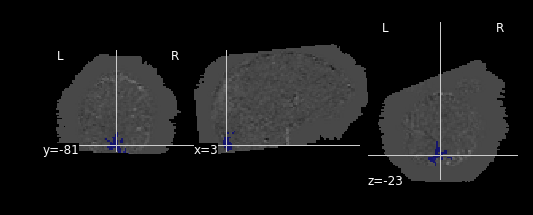

In [16]:
plot_roi(v1_mask,first)

###Consider resampling to lower resolution before masking the run

In [17]:
from nilearn.masking import apply_mask
ips_masked = apply_mask(run1,ips_mask)
v1_masked = apply_mask(run1,v1_mask)

In [18]:
ips_masked.shape

(26, 306)

In [19]:
v1_masked.shape

(26, 515)

In [20]:
from scipy.io import savemat

In [21]:
outname = 'ips0_trn.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [23]:
savemat(outpathname,{'ips0_trn':ips_masked})

In [22]:
from nilearn.input_data import NiftiMasker

In [23]:
v1_masker = NiftiMasker(mask_img=v1_mask, standardize=True)
ips0_masker = NiftiMasker(mask_img=ips_mask, standardize=True)

In [24]:
v1_masked = v1_masker.fit_transform(run1)
ips_masked = ips0_masker.fit_transform(run1)

In [25]:
v1_masked.shape

(26, 515)

In [26]:
ips_masked.shape

(26, 306)

In [27]:
v1_masked

array([[ 0.60553145,  0.        ,  0.17302032, ..., -0.40102625,
        -1.19487095, -1.02198517],
       [-0.21007159,  0.        ,  0.48453477, ...,  0.37859663,
        -0.5348388 , -0.45397824],
       [-0.43851113,  0.        ,  0.09452495, ...,  0.20180163,
        -0.3513656 ,  0.71818399],
       ..., 
       [ 1.94566214,  0.        ,  0.03410923, ..., -1.09266567,
         0.47404623,  1.59655607],
       [ 0.35875231,  0.        ,  0.40953729, ...,  1.60235834,
        -0.47835961, -0.29671147],
       [-2.36215806,  0.        , -3.53620219, ...,  1.63329697,
         0.11616431, -1.7105937 ]], dtype=float32)

##Generalize to combine 3 runs for training set

In [28]:
runs = ['run1', 'run2', 'run3', 'run4']
maskpath = '/fMRI/NLine-Space/s_03001/ROIs/'
brains_dict = {}
for run in runs:
    print run
    filename = 's_03001_S_'+run+'_unsorted_highres.nii.gz'
    brains_dict[run] = {}
    brains_dict[run]['brain'] = nibabel.load(filename)
    #ips_maskname = maskpath+'IPS0_F2.nii.gz'
    #v1_maskname = maskpath+'V1_F2.nii.gz'
    ips_maskname = ips0roinames[0]
    v1_maskname = v1roinames[0]
    #ips_maskname = maskpath+'IPS0_S_'+run+'.nii.gz'
    #v1_maskname = maskpath+'V1_S_'+run+'.nii.gz'
    v1_mask = nibabel.load(v1_maskname)
    ips0_mask = nibabel.load(ips_maskname)
    v1_masker = NiftiMasker(mask_img=v1_mask, standardize=True)
    ips0_masker = NiftiMasker(mask_img=ips0_mask, standardize=True)
    brains_dict[run]['v1_masked'] = v1_masker.fit_transform(brains_dict[run]['brain'])
    brains_dict[run]['ips_masked'] = ips0_masker.fit_transform(brains_dict[run]['brain'])
    print brains_dict[run]['ips_masked'].shape
    print brains_dict[run]['v1_masked'].shape

run1
(26, 306)
(26, 515)
run2
(26, 306)
(26, 515)
run3
(26, 306)
(26, 515)
run4
(26, 306)
(26, 515)


In [29]:
concat_ips = np.ma.concatenate([brains_dict['run1']['ips_masked'],brains_dict['run2']['ips_masked'],
                                 brains_dict['run3']['ips_masked'],brains_dict['run4']['ips_masked']])
concat_v1 = np.ma.concatenate([brains_dict['run1']['v1_masked'],brains_dict['run2']['v1_masked'],
                                 brains_dict['run3']['v1_masked'],brains_dict['run4']['v1_masked']])

In [30]:
concat_ips.shape

(104, 306)

In [31]:
concat_v1.shape

(104, 515)

In [32]:
outname = 'ips0.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [33]:
savemat(outpathname,{'ips0':concat_ips})

In [34]:
outname = 'v1.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [35]:
savemat(outpathname,{'v1':concat_v1})

##Create index for runs

In [45]:
ntrials = run1.shape[3]
rns = np.transpose(np.concatenate([np.repeat(1,ntrials),np.repeat(2,ntrials),np.repeat(3,ntrials),np.repeat(4,ntrials)]))

In [46]:
rns.reshape((len(rns),1))
rns.shape

(104,)

In [47]:
rns = np.matrix(rns).transpose()

In [48]:
rns.shape

(104, 1)

In [49]:
outname = 'rns.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [50]:
savemat(outpathname,{'rns':rns})

This is when I separate first 3 runs from the testing run

In [71]:
#outname = 'ips0_trn.mat'
#outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
#outpathname = outpath+outname

In [72]:
#savemat(outpathname,{'ips0_trn':concat_ips})

In [73]:
#outname = 'v1_trn.mat'
#outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
#outpathname = outpath+outname

In [74]:
#savemat(outpathname,{'v1_trn':concat_v1})

In [75]:
#ntrials = run1.shape[3]
#rn_r = np.transpose(np.concatenate([np.repeat(1,ntrials),np.repeat(2,ntrials),np.repeat(3,ntrials)]))

In [76]:
#trn_r.reshape((len(trn_r),1))
#trn_r.shape

(78,)

In [77]:
#trn_r = np.matrix(trn_r).transpose()

In [78]:
#trn_r.shape

(78, 1)

##Create index for runs

In [79]:
#outname = 'trn_r.mat'
#outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
#outpathname = outpath+outname

In [80]:
#savemat(outpathname,{'trn_r':trn_r})

## Now the test run

In [81]:
outname = 'ips0_tst.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [82]:
savemat(outpathname,{'ips0_tst':brains_dict['run4']['ips_masked']})

In [83]:
outname = 'v1_tst.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [84]:
savemat(outpathname,{'v1_tst':brains_dict['run4']['v1_masked']})

##Create index for test runs

In [85]:
tst_r = np.transpose(np.repeat(1,ntrials))
tst_r

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [86]:
tst_r = np.matrix(tst_r).transpose()
tst_r.shape

(26, 1)

In [87]:
outname = 'tst_r.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [88]:
savemat(outpathname,{'tst_r':tst_r})